This data set is populated by capturing user ratings from Google reviews. 

Reviews on attractions from 24 categories across Europe are considered.

Google user rating ranges from 1 to 5 and average user rating per category is calculated.

https://archive.ics.uci.edu/ml/datasets/Tarvel+Review+Ratings#


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import cluster
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import warnings
import numpy as np
import seaborn as sns

warnings.simplefilter('ignore')
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('google_review_ratings.csv')

# Exploratory analysis
## And some cleaning

In [3]:
df.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [4]:
df.shape

(5456, 26)

In [5]:
df.isnull().sum()
# One column is completely empty : unnamed
# some columns have 1 Nan : we'll fill these with 0, as it's the default value
# when no review was left

User              0
Category 1        0
Category 2        0
Category 3        0
Category 4        0
Category 5        0
Category 6        0
Category 7        0
Category 8        0
Category 9        0
Category 10       0
Category 11       0
Category 12       1
Category 13       0
Category 14       0
Category 15       0
Category 16       0
Category 17       0
Category 18       0
Category 19       0
Category 20       0
Category 21       0
Category 22       0
Category 23       0
Category 24       1
Unnamed: 25    5454
dtype: int64

In [6]:
df.drop(['Unnamed: 25','User'], axis=1, inplace=True)

In [7]:
df.fillna(value=0.0,inplace=True )

Attribute 1 : Unique user id 

Attribute 2 : Average ratings on churches 

Attribute 3 : Average ratings on resorts 

Attribute 4 : Average ratings on beaches 

Attribute 5 : Average ratings on parks 

Attribute 6 : Average ratings on theatres 

Attribute 7 : Average ratings on museums 

Attribute 8 : Average ratings on malls 

Attribute 9 : Average ratings on zoo 

Attribute 10 : Average ratings on restaurants 

Attribute 11 : Average ratings on pubs/bars 

Attribute 12 : Average ratings on local services 

Attribute 13 : Average ratings on burger/pizza shops 

Attribute 14 : Average ratings on hotels/other lodgings 

Attribute 15 : Average ratings on juice bars 

Attribute 16 : Average ratings on art galleries 

Attribute 17 : Average ratings on dance clubs 

Attribute 18 : Average ratings on swimming pools 

Attribute 19 : Average ratings on gyms 

Attribute 20 : Average ratings on bakeries 

Attribute 21 : Average ratings on beauty & spas 

Attribute 22 : Average ratings on cafes 

Attribute 23 : Average ratings on view points 

Attribute 24 : Average ratings on monuments 

Attribute 25 : Average ratings on gardens


In [8]:
# Changing column names for better lisibility
df.columns = ['churches' ,'resorts' ,'beaches' ,'parks' ,'theatres' ,'museums' ,'malls' ,'zoo' ,'restaurants' ,'pubs_bars' ,'localservices' ,'burger_pizza' ,'hotels_lodgings' ,'juice_bars','art_galleries' ,'dance_clubs' ,'pools' ,'gyms' ,'bakeries' ,'beauty_spas' ,'cafes' ,'view_points' ,'monuments' ,'gardens']

In [9]:
df.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [10]:
df.dtypes

churches           float64
resorts            float64
beaches            float64
parks              float64
theatres           float64
museums            float64
malls              float64
zoo                float64
restaurants        float64
pubs_bars          float64
localservices       object
burger_pizza       float64
hotels_lodgings    float64
juice_bars         float64
art_galleries      float64
dance_clubs        float64
pools              float64
gyms               float64
bakeries           float64
beauty_spas        float64
cafes              float64
view_points        float64
monuments          float64
gardens            float64
dtype: object

In [11]:
df.localservices = pd.to_numeric(df.localservices, errors='coerce')
df.fillna(value=0.0,inplace=True )
df.isnull().sum()

churches           0
resorts            0
beaches            0
parks              0
theatres           0
museums            0
malls              0
zoo                0
restaurants        0
pubs_bars          0
localservices      0
burger_pizza       0
hotels_lodgings    0
juice_bars         0
art_galleries      0
dance_clubs        0
pools              0
gyms               0
bakeries           0
beauty_spas        0
cafes              0
view_points        0
monuments          0
gardens            0
dtype: int64

In [12]:
df.describe()
# All values are between 0 and 5, which means there are no outliers.

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560469
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171840
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


There are no outliers (we see this from the 'describe'), and no nans. The DF is clean.

However : the zeros, I feel, are going to bias the means and calculations.
I'm going to switch back and forth between zeros and nans, as nans are not taken into account when calculating means. I'll switch back to zeros when doing PCAs and plots.

# Exploratory analysis

In [13]:
# Function to plot distplots in a loop, for exploratory purposes :

def distplots(df):
    
    colorlist = ['red','gold','orange','limegreen','seagreen','darkcyan','blue','darkorchid','hotpink','darkmagenta']
    n=len(df.columns.tolist())

    if n %2 == 0:
        nr = int(n/2)
    else:
        nr = int((n+1)/2)
        
    titles = df.columns.tolist()

    fig, axes = plt.subplots(nrows=nr, ncols=2, figsize = (20,12))
    
    for ax, tit,i in zip(axes.flat, titles, range(0,n)):
        sns.distplot(df.iloc[:,i], ax=ax, color=colorlist[i])
        ax.set(title=tit)
        ax.set_xlabel('')
        ax.title.set_size(18)
    plt.tight_layout()
    
    fig.suptitle('Distributions',y=1.03,  fontsize=22)
    return

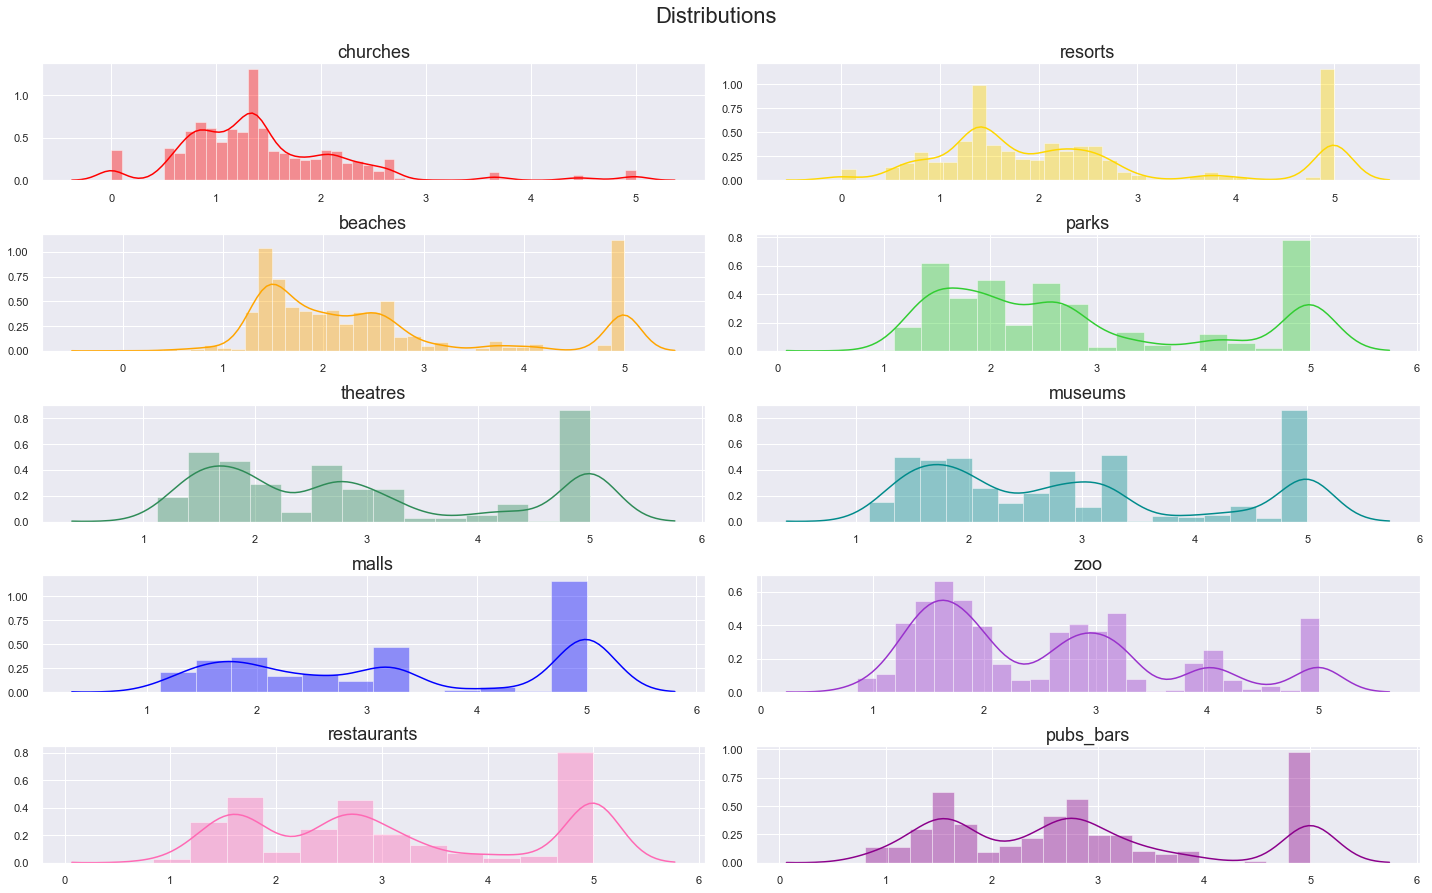

In [14]:
distplots(df.iloc[:,:10])
# Different types of locations have very different distributions of votes.

In [15]:
df = df.replace(0.0, np.nan)

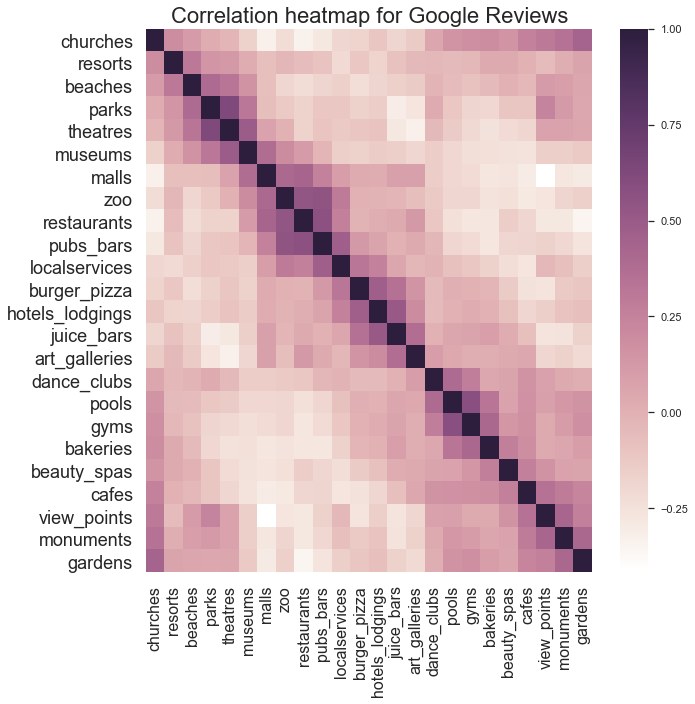

In [16]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data=df.corr(), cmap=cmap)
plt.title('Correlation heatmap for Google Reviews', fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=18)
plt.show()

# We can already see some correlations, that could appear in clusters : 
# churches, cafes, beaches, gardens, monuments "historical tourism"
# parks and viewpoints "outdoorsy ppl"
# malls, zoos and restaurants  "family ppl"...

# Feature engineering
## PCA

In [17]:
df.fillna(value=0.0,inplace=True )

In [18]:
df_nump = df.values #values to get numpy array
df_nump = MinMaxScaler().fit_transform(df_nump)

pca = PCA(n_components=4)
df_pca = pca.fit_transform(df_nump)

In [19]:
pca.explained_variance_ratio_

array([0.20260698, 0.16458678, 0.09171061, 0.07355683])

PCA, as is, doesn't bring very good results.

Using an automatic feature engineering technique didn't work very well. 
I'm going to use my brain to try and categorize the locations.

In [20]:
hotelsresorts=['resorts','hotels_lodgings']
snacks = ['cafes', 'bakeries','juice_bars' ]
sporty = ['pools' ,'gyms']
food = ['restaurants','burger_pizza' ]
nightlife=['pubs_bars', 'dance_clubs' ]
historical = ['churches','monuments']
cultural = ['theatres' ,'museums','art_galleries']
nature = ['beaches','gardens','parks','view_points', 'zoo' ]

newcols = {'hotelsresorts':hotelsresorts, 'snacks':snacks, 'sporty':sporty, 'food':food, 'nightlife':nightlife, 'historical':historical, 'cultural':cultural, 'nature':nature}

def catmean(df, newcols):
    #replacing zeros by nans to ajust the means
    df = df.replace(0.0, np.nan)
    for i,j in newcols.items():     
        #creating new cols, summing values from old columns and mean
        df[i]=df[j].mean(axis=1)  
        df.drop(j,axis=1, inplace=True)  
    df.fillna(value=0.0,inplace=True )
    #filling nans with zeros again
    
    return df

In [21]:
df = catmean(df,newcols)
df.head()

,malls,localservices,beauty_spas,hotelsresorts,snacks,sporty,food,nightlife,historical,cultural,nature
0,5.0,1.70,0.0,1.7,1.11,0.5,2.01,1.615,0.0,3.22,3.210000
1,5.0,1.70,0.0,1.7,1.11,0.5,2.01,1.620,0.0,3.22,3.306667
2,5.0,1.70,0.0,1.7,1.11,0.5,2.01,1.615,0.0,3.22,3.300000
3,5.0,1.73,0.0,1.1,1.11,0.5,2.01,1.615,0.0,3.22,3.203333
4,5.0,1.70,0.0,1.7,1.11,0.5,2.01,1.615,0.0,3.22,3.300000


### PCA on shrunken df

In [22]:
pcasmall = PCA(n_components=3)
df_pcasmall = pcasmall.fit_transform(df)
pcasmall.explained_variance_ratio_

array([0.27995501, 0.17605267, 0.11735919])

In [23]:
# With standardization :
dfnp = df.values
dfstand = StandardScaler().fit_transform(dfnp)

pcasmall2 = PCA(n_components=3)
df_pcasmall2 = pcasmall2.fit_transform(dfstand)
pcasmall2.explained_variance_ratio_


array([0.22942563, 0.16287579, 0.12617786])

In [24]:
# With minmax scaling :
dfnp = df.values
dfminmax = MinMaxScaler().fit_transform(dfnp)

pcasmall3 = PCA(n_components=3)
df_pcasmall3 = pcasmall3.fit_transform(dfminmax)
pcasmall3.explained_variance_ratio_
# Best one yet

array([0.29500986, 0.17074864, 0.11602878])

In [25]:
# Creating PCA table with minmax scaled values :

pcminmax_3D = pd.DataFrame(data = df_pcasmall3
             ,columns = ['comp1', 'comp2', 'comp3'])
pcminmax_3D.head()

,comp1,comp2,comp3
0,-0.356205,-0.398631,-0.212379
1,-0.353115,-0.400449,-0.223252
2,-0.353172,-0.400623,-0.222415
3,-0.357776,-0.413508,-0.277986
4,-0.353172,-0.400623,-0.222415


### Binary option : ppl have been to locations, or not

I want to try out a different way of categorizing users : only 0 or 1, if they have voted for locations or not. 
This is not the same analysis as looking at averages, but the pca is better, so I want to see if I can use it.

In [26]:
dfyesno=df.copy()

for col in dfyesno.columns:
    dfyesno[col]=[0 if i==0 else 1 for i in dfyesno[col]] 

dfyesno.head() 

,malls,localservices,beauty_spas,hotelsresorts,snacks,sporty,food,nightlife,historical,cultural,nature
0,1,1,0,1,1,1,1,1,0,1,1
1,1,1,0,1,1,1,1,1,0,1,1
2,1,1,0,1,1,1,1,1,0,1,1
3,1,1,0,1,1,1,1,1,0,1,1
4,1,1,0,1,1,1,1,1,0,1,1


In [27]:
Xpca = dfyesno.values
Xpca = StandardScaler().fit_transform(Xpca)
pca = PCA(2)
Xreduced = pca.fit_transform(Xpca)

In [28]:
pca.explained_variance_ratio_

array([0.32732386, 0.2500083 ])

In [29]:
ppc = pd.DataFrame(data = Xreduced
             ,columns = ['comp1', 'comp2'])
ppc.head() # A dataframe we can add labels to

,comp1,comp2
0,4.138208,0.836295
1,4.138208,0.836295
2,4.138208,0.836295
3,4.138208,0.836295
4,4.138208,0.836295


   # Clustering

## Using shrunk DF

### Testing best nb of clusters

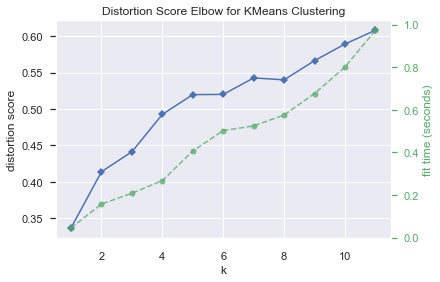

In [30]:
KMmodel = cluster.KMeans()
visualizer = KElbowVisualizer(KMmodel, k=(1,12))
visualizer.fit(pcminmax_3D)
visualizer.poof()

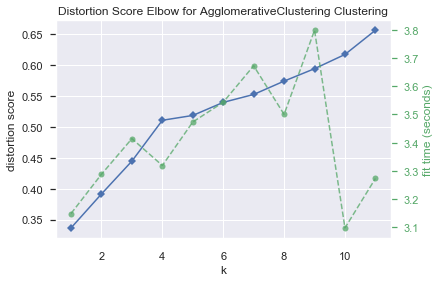

In [31]:
Agglomodel = cluster.AgglomerativeClustering()
visualizer = KElbowVisualizer(Agglomodel, k=(1,12))
visualizer.fit(pcminmax_3D)
visualizer.poof()

In [32]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.14).fit(pcminmax_3D)
np.unique(dbscan.labels_)

array([-1,  0,  1,  2], dtype=int64)

DBSCAN returns 4 labels with eps=0.14 (I played around with eps).
I will compare with 4 labels with Kmeans.

In [33]:
from sklearn import mixture
gmm=mixture.GaussianMixture(4).fit(pcminmax_3D)
gmpred = gmm.predict(pcminmax_3D)

In [34]:
kmeans=cluster.KMeans(5)
kmeans.fit(pcminmax_3D)
pcminmax_3D['kmeans_labels']=kmeans.fit_predict(pcminmax_3D)
pcminmax_3D['dbscan_labels']=dbscan.labels_
pcminmax_3D['gaussian_mix']=gmpred

### Plotting clusters

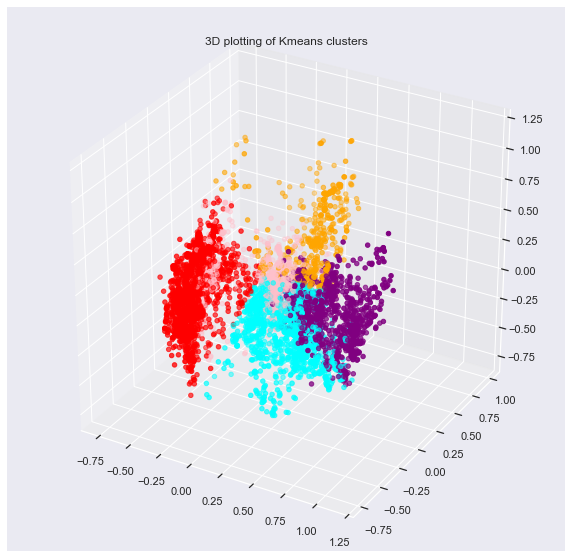

In [35]:

colors=np.array(['red','cyan','purple','orange','pink'])
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pcminmax_3D['comp1'], pcminmax_3D['comp2'], pcminmax_3D['comp3'], c = colors[pcminmax_3D['kmeans_labels']], marker='o')
plt.title('3D plotting of Kmeans clusters')
plt.show()

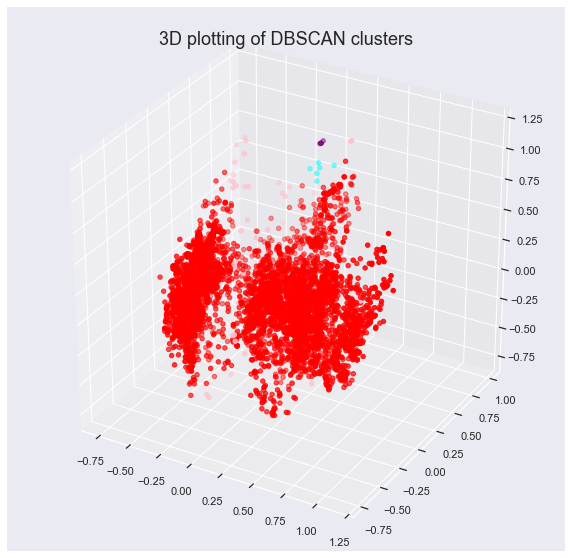

In [36]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pcminmax_3D['comp1'], pcminmax_3D['comp2'], pcminmax_3D['comp3'], c = colors[pcminmax_3D['dbscan_labels']], marker='o')
plt.title('3D plotting of DBSCAN clusters', fontsize=18)
plt.show()
# Obviously, DBSCAN doesn't work very well because the data has a homogenous density.

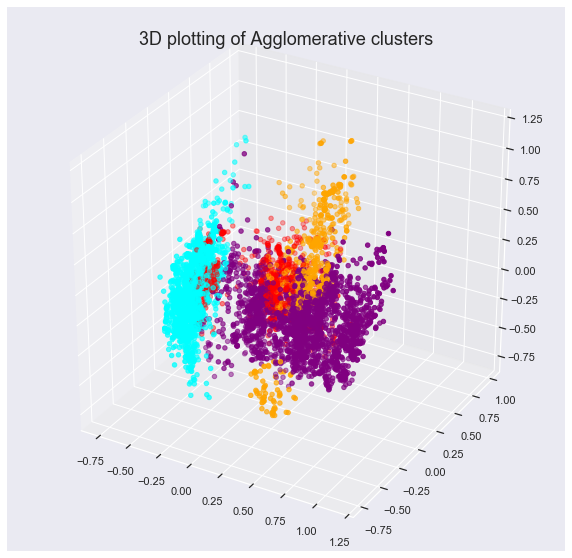

In [37]:

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pcminmax_3D['comp1'], pcminmax_3D['comp2'], pcminmax_3D['comp3'], c = colors[pcminmax_3D['gaussian_mix']], marker='o')
plt.title('3D plotting of Agglomerative clusters', fontsize=18)
plt.show()

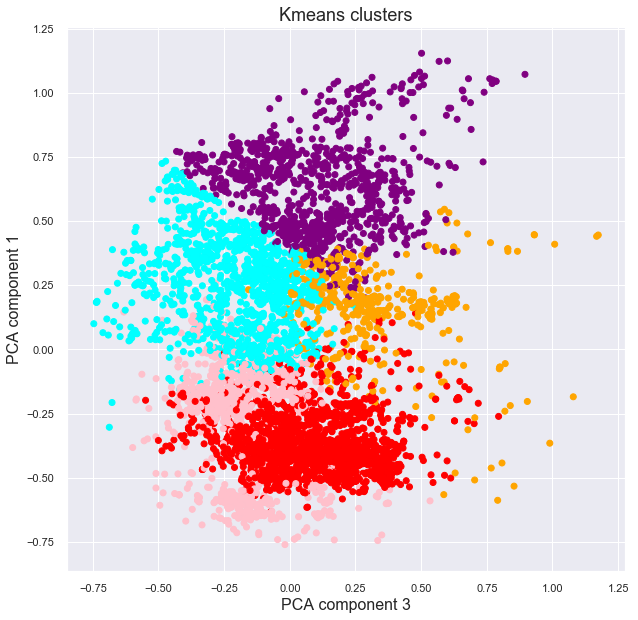

In [38]:
# plt.figure(figsize = (10,10))
colors=np.array(['red','cyan','purple','orange', 'pink'])
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.scatter(pcminmax_3D['comp3'], pcminmax_3D['comp1'], c = colors[pcminmax_3D['kmeans_labels']], marker='o')
plt.title('Kmeans clusters', fontsize=18)
plt.xlabel('PCA component 3', fontsize = 16)
plt.ylabel('PCA component 1', fontsize = 16)
plt.show()

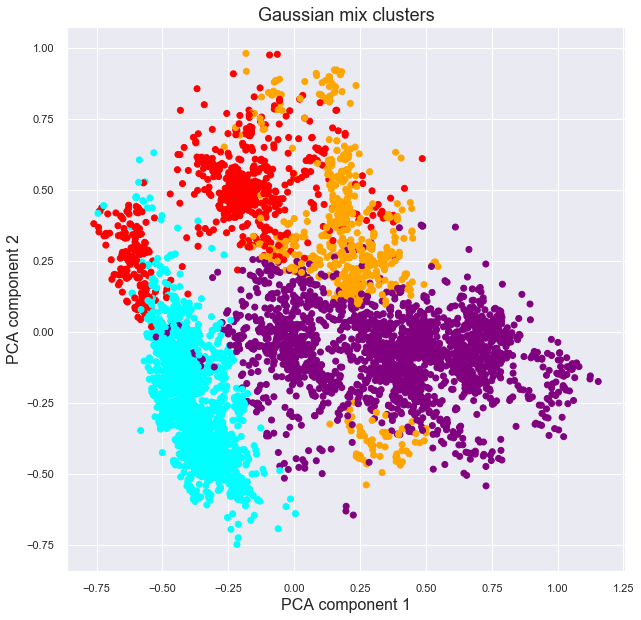

In [39]:

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.scatter(pcminmax_3D['comp1'], pcminmax_3D['comp2'], c = colors[pcminmax_3D['gaussian_mix']], marker='o')
plt.title('Gaussian mix clusters',fontsize=18)
plt.xlabel('PCA component 1', fontsize = 16)
plt.ylabel('PCA component 2', fontsize = 16)
plt.show()

In [40]:
score1 = silhouette_score(pcminmax_3D, kmeans.labels_, metric='euclidean')
score2 = silhouette_score(pcminmax_3D, dbscan.labels_, metric='euclidean')
score3 = silhouette_score(pcminmax_3D, gmpred, metric='euclidean')

print(f'Silhouette score for KMEANS : {score1}')
print(f'Silhouette score for DBSCAN : {score2}')
print(f'Silhouette score for GaussianMix : {score3}')

Silhouette score for KMEANS : 0.6390415357288932
Silhouette score for DBSCAN : 0.12939073118112746
Silhouette score for GaussianMix : 0.5572379367713112


In [41]:
# Just for practise

# from sklearn.manifold import TSNE


# fig, ax = plt.subplots(1, 4, figsize=(15, 7))
# for i, perp in enumerate([30, 50]):
#     tsne = TSNE(perplexity=perp)
#     x_embedded = tsne.fit_transform(df)
#     ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1], c=colors[pcminmax_3D['kmeans_labels']])
#     ax[i].set_title("Perplexity = {}".format(perp))
    
# plt.show()

### Understanding clusters

NB : Clusters might not appear in the same order as they did when I originally run the code.

In [42]:
# Let's add labels to the dataframe.
df['labels']=(pcminmax_3D['kmeans_labels']+1)

In [43]:
df.head()

,malls,localservices,beauty_spas,hotelsresorts,snacks,sporty,food,nightlife,historical,cultural,nature,labels
0,5.0,1.70,0.0,1.7,1.11,0.5,2.01,1.615,0.0,3.22,3.210000,1
1,5.0,1.70,0.0,1.7,1.11,0.5,2.01,1.620,0.0,3.22,3.306667,1
2,5.0,1.70,0.0,1.7,1.11,0.5,2.01,1.615,0.0,3.22,3.300000,1
3,5.0,1.73,0.0,1.1,1.11,0.5,2.01,1.615,0.0,3.22,3.203333,1
4,5.0,1.70,0.0,1.7,1.11,0.5,2.01,1.615,0.0,3.22,3.300000,1


In [44]:
df = df.replace(0.0, np.nan)
smallclusters = df.pivot_table(index=['labels'], aggfunc=np.mean).T
smallclusters

labels,1,2,3,4,5
beauty_spas,0.907688,0.721622,2.509885,1.221026,0.691319
cultural,3.077810,2.888414,2.126288,2.426081,2.370585
food,2.838187,2.196942,1.663864,3.485934,3.200084
historical,1.169043,1.849069,2.264215,1.045909,1.375711
hotelsresorts,2.264829,2.143928,2.153120,3.221055,2.051999
localservices,2.059848,2.073641,1.444964,3.222901,4.901733
malls,4.932208,2.484215,1.820806,1.969363,3.638612
nature,2.044855,2.785601,2.345455,1.661819,2.249374
nightlife,1.971906,1.961040,1.547624,2.251451,2.693111
snacks,1.532666,1.097598,2.019220,2.669114,1.140390


In [45]:
# checking the difference with the df with zeros instead of nans :
df.fillna(value=0.0,inplace=True )
smallclusters2 = df.pivot_table(index=['labels'], aggfunc=np.mean).T
smallclustersdiff = smallclusters2-smallclusters
smallclustersdiff
# We can see up to -0.3 difference bewteen average ratings

labels,1,2,3,4,5
beauty_spas,-0.121914,-0.084656,-0.020743,-0.305927,-0.275662
cultural,0.000000,0.000000,0.000000,0.000000,0.000000
food,0.000000,0.000000,0.000000,0.000000,0.000000
historical,-0.013350,-0.032912,0.000000,-0.312623,-0.022976
hotelsresorts,0.000000,0.000000,0.000000,0.000000,0.000000
localservices,0.000000,0.000000,-0.001493,0.000000,0.000000
malls,0.000000,0.000000,0.000000,0.000000,0.000000
nature,0.000000,0.000000,0.000000,0.000000,0.000000
nightlife,0.000000,0.000000,0.000000,0.000000,0.000000
snacks,0.000000,0.000000,0.000000,0.000000,0.000000


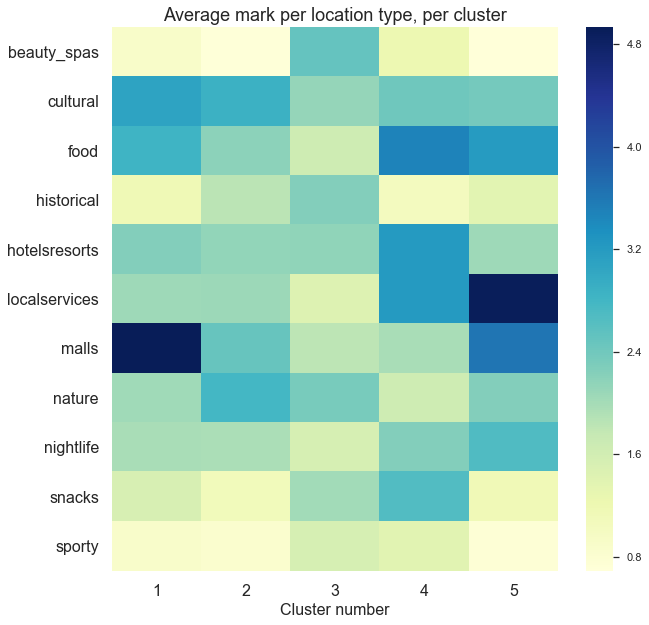

In [46]:
plt.figure(figsize = (10,10))
sns.heatmap(smallclusters, cmap = 'YlGnBu')

plt.title('Average mark per location type, per cluster', fontsize=18)
plt.xticks(fontsize=16)
plt.xlabel('Cluster number',fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Let's try and sort labels by ppl's interests.

In [47]:
dflabels = pd.DataFrame(columns=['interest','rating','label'])

for i in range (1,6):
    minidf = (smallclusters[i].nlargest(5)).reset_index()
    minidf.columns=['interest','rating']
    minidf['label']=i
    dflabels = pd.concat([dflabels,minidf], ignore_index=True)

In [48]:
dflabels

,interest,rating,label
0,malls,4.932208,1
1,cultural,3.077810,1
2,food,2.838187,1
3,hotelsresorts,2.264829,1
4,localservices,2.059848,1
5,cultural,2.888414,2
6,nature,2.785601,2
7,malls,2.484215,2
8,food,2.196942,2
9,hotelsresorts,2.143928,2


In [49]:
dflabels[dflabels['label']==1]

,interest,rating,label
0,malls,4.932208,1
1,cultural,3.077810,1
2,food,2.838187,1
3,hotelsresorts,2.264829,1
4,localservices,2.059848,1


People from cluster 1 really enjoy malls, cultural outings, restaurants and hotels.
They are probably travellers, who stay in hotels, spend money in malls and eat out.

In [50]:
dflabels[dflabels['label']==2]

,interest,rating,label
5,cultural,2.888414,2
6,nature,2.785601,2
7,malls,2.484215,2
8,food,2.196942,2
9,hotelsresorts,2.143928,2


Cluster 2 has an interest in local services. To understand what "local services" really means, let's turn to Google :
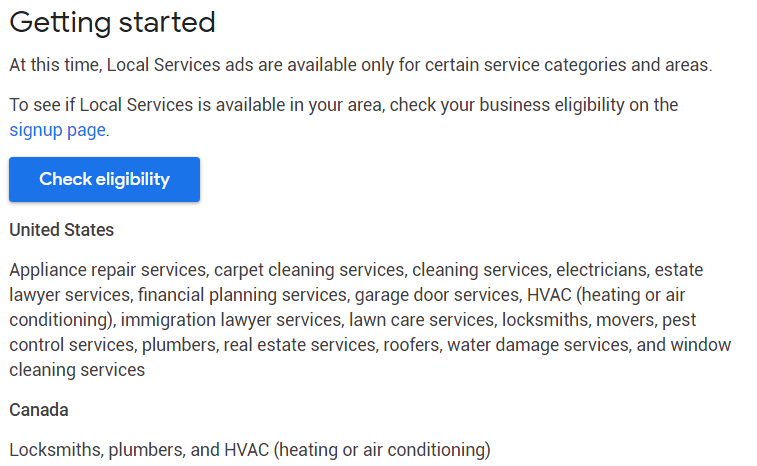
Cleaners, plumbers, real estate, lawyers...
These people enjoy local outings, spending some money in malls and restaurants, probably around their neighbourhood.

In [51]:
dflabels[dflabels['label']==3]

,interest,rating,label
10,beauty_spas,2.509885,3
11,nature,2.345455,3
12,historical,2.264215,3
13,hotelsresorts,2.153120,3
14,cultural,2.126288,3


Outdoorsy people, maybe ? Who like to travel and take care of themselves with beauty treatments. 

In [52]:
dflabels[dflabels['label']==4]

,interest,rating,label
15,food,3.485934,4
16,localservices,3.222901,4
17,hotelsresorts,3.221055,4
18,snacks,2.669114,4
19,cultural,2.426081,4


Local services again, people who enjoy their own neighborhood, but with an extra interest in travelling.

In [53]:
dflabels[dflabels['label']==5]

,interest,rating,label
20,localservices,4.901733,5
21,malls,3.638612,5
22,food,3.200084,5
23,nightlife,2.693111,5
24,cultural,2.370585,5


Malls, culture, nature, food, and hotels : this may be the "family" cluster.